# Домашнее задание

(прислать до 02:00 20.05.2019)

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Пусть $\varphi: \mathbb{R} \to \mathbb{R}$ возрастающая и выпуклая функция. Также $f: \mathbb{R}^n \to \mathbb{R}$ выпуклая, следовательно $g(x) = \varphi(f(x))$ также выпуклая функция. Также пусть $f$ и $g$ дважды диференцируемы.

- (0.4 pts) Как связаны между собой задачи минимизации $f$ и $g$?
- (0.6 pts) Сравните градиентный метод и метод Ньютона для решения задач минимизации $f$ и $g$. Как связаны направления, получаемые каждым из методов? Как связаны методы в случае использования наискорейшего спуска для выбора шага?

- Связь задач минимизации

$\nabla g(x) = \nabla \phi ( f (x)) = \phi'(y) \nabla f(x)$

$\nabla^2 g(x) = \nabla^2 \phi ( f (x)) = \phi''(y) \nabla f(x)\otimes (\nabla f)^T + \phi'(y) \nabla^2 f(x)$

$\phi$ - возрастающая $\Rightarrow \phi'(y) > 0$

$f$ и $g$ - дважды дифференциируемы и выпуклы, значит:$\nabla f(x^*) = 0 \Leftrightarrow x^*$ - минимум или максимум.

В минимуме(максимуме) $f$:

$\nabla g(x) = 0$ 

$\nabla^2 g(x) = \phi'(y) \nabla^2 f(x)$ - вторая производная $f$ имеет ту же знакоопределенность, что и $g$

Значит, минимумы(максимумы) функции $f$ являются минимумами(максимумами) функции $g$. 

Верно и обратное, т.к. из $\nabla g(x) = 0$, $\phi'(y) > 0$ следует, что $\nabla f(x) = 0$, и знакоопределенности вторых производных совпадают тоже.

Связь задач: $x^*$ - минимум(максимум) функции $f$ $\Leftrightarrow$ $x^*$ - минимум(максимум) функции $g$

- Сравнение методов

Направления в градиентном спуске:

$h_f = -\nabla f$

$h_g = -\nabla g = -\phi'\nabla f$

Направления в Ньютоновском методе:

$\tilde{h}_f = - (\nabla^2 f)^{-1} \nabla f = (\nabla^2 f)^{-1}h_f$

$\tilde{h}_g = - (\nabla^2 g)^{-1} \nabla g = -\Big(\phi''(y) \nabla f(x)\otimes (\nabla f)^T + \phi'(y) \nabla^2 f(x)\Big)^{-1}  \phi'(y) \nabla f(x) = (\nabla^2 g)^{-1} h_g = \Big(\phi''(y) h_f\nabla \otimes (h_f)^T - \phi'(y) \nabla h_f\Big)^{-1}  h_g $

Наискорейший спуск:

Для $f$: $\lambda_j = \text{argmin}_{\lambda} f(x_j - \lambda h_{f,j})$


## Задача 2

- (0.4 pts) Для задачи

$$
\log (e^x + e^{-x}) \to \min
$$

запустите метод Ньютона с постоянным шагом $\alpha = 1$ из точки $x_0 = 1$ и $x_0 = 1.1$. Что Вы заметили и почему?
- (0.4 pts) Что произойдёт, если использовать демпфированный метод Ньютона? Почему?
- (0.2 pts) Постройте графики сходимости для каждой постановки эксперимента и оцените время работы каждого метода.
При сравнении сходимости для разных условий стройте линии на одном графике и добавляйте легенду, иначе очень сложно понять, что происходит.
Также для сравнения сходимости достаточно указывать изменение нормы градиента, чтобы не загромождать рисунок.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
import time

In [3]:
def Newton1D(f, gradf, hessf, x0, epsilon, num_iter, line_search, 
                    disp=False, callback=None, **kwargs):
    start = time.time()
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        opt_arg["iteration"] = iteration
        gradient = gradf(x)
        hess = hessf(x)
        #h = np.linalg.solve(hess, -gradient)
        h = -gradient / hess # так, наверное, лучше не делать 
        alpha = line_search(x, h, **opt_arg)
        x = x + alpha * h
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    end = time.time()
    print("Estimated time: ", (end - start))
    return res

In [4]:
def linesearch_(x, *args, **kwargs):
    return 1

def sqrt_iter_stepsize(x, *args, **kwargs):
    return 1/np.sqrt(kwargs["iteration"]+1)

#переделка функций из liboptpy.step_size.py

def armijo_stepsize(x, h, *args, **kwargs):
    alpha = kwargs["alpha"]
    rho = kwargs["rho"]
    beta = kwargs["beta"]
    assert beta < 0.5, "Armijo rule is applicable for beta less than 0.5"
    assert rho < 1, "Decay factor has to be less than 1"
    f = kwargs["f"]
    grad_f = kwargs["grad_f"]
    current_grad = grad_f(x)
    current_f = f(x)
    x_next = x + alpha * h
    while True:
        if np.isnan(f(x_next)):
            alpha *= rho
        else:
            if f(x_next) >= current_f + beta * current_grad.dot(x_next - x):
                alpha *= rho
            else:
                break
        if alpha < 1e-16:
            break
        x_next = x + alpha * h
    return alpha
        
def wolfe_stepsize(x, h, *args, **kwargs):
    alpha = kwargs["alpha"]
    rho = kwargs["rho"]
    assert rho < 1, "Decay factor has to be less than 1"
    beta1 = kwargs["beta1"]
    beta2 = kwargs["beta2"]
    assert 0 < beta1 < beta2 < 1, "Wolfe rule is applicable for betas such that 0 < beta1 < beta2 < 1"
    grad_f = kwargs["grad_f"]
    f = kwargs["f"]
    current_grad = grad_f(x)
    current_f = f(x)
    while True: 
        if np.isnan(f(x + alpha * h)):
            alpha *= rho
        else:
            if f(x + alpha * h) > current_f + beta1 * alpha * current_grad.dot(h):
                alpha *= rho
            elif h.dot(grad_f(x + alpha * h)) < beta2 * h.dot(current_grad):
                alpha *= rho
            else:
                break
        if alpha < 1e-10:
            break
    return alpha
        
#def get_stepsize(self, h, x, num_iter, *args):        
#    alpha = self.par["init_alpha"]
#        elif self.rule == "Goldstein":
#            pass
 
    
def wolfe_strong_stepsize(x, h, *args, **kwargs):
    alpha = kwargs["alpha"]
    rho = kwargs["rho"]
    assert rho < 1, "Decay factor has to be less than 1"
    beta1 = kwargs["beta1"]
    beta2 = kwargs["beta2"]
    assert 0 < beta1 < beta2 < 1, "Wolfe rule is applicable for betas such that 0 < beta1 < beta2 < 1"
    grad_f = kwargs["grad_f"]
    f = kwargs["f"]
    current_grad = grad_f(x)
    current_f = f(x)
    while True: 
        if np.isnan(f(x + alpha * h)):
            alpha *= rho
        else:
            if f(x + alpha * h) > current_f + beta1 * alpha * current_grad.dot(h):
                alpha *= rho
            elif np.abs(h.dot(grad_f(x + alpha * h))) > beta2 * np.abs(h.dot(current_grad)):
                alpha *= rho
            else:
                break
        if alpha < 1e-10:
            break
    return alpha

In [5]:
def callback_(x, hist_1, hist_2, hist_3):
    hist_1.append(x)
    hist_2.append(f(x))
    hist_3.append(np.linalg.norm(grad_f(x)))
    return

x_history = []
f_history = []
grad_f_history = []

callback = lambda x: callback_(x, x_history, f_history, grad_f_history)

In [6]:
f = lambda x: np.log(np.exp(x) + np.exp(-x))
grad_f = lambda x: (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
hess_f = lambda x: 4/((np.exp(x) + np.exp(-x))**2)
x01 = np.ones(1)
x02 = x01 + 0.1

x_history = []
f_history = []
grad_f_history = []

x1 = Newton1D(f, grad_f, hess_f, x01, 1e-6, 100, linesearch_, disp = True, callback=callback)

x1_history = x_history
f1_history = f_history
grad_f1_history = grad_f_history

x_history = []
f_history = []
grad_f_history = []

Current function val = [0.99286901]
Current gradient norm =  0.6714781841373958
Current function val = [0.7747108]
Current gradient norm =  0.38796507601847524
Current function val = [0.69426564]
Current gradient norm =  0.047269662404905495
Current function val = [0.69314718]
Current gradient norm =  7.060280352733244e-05
Current function val = [0.69314718]
Current gradient norm =  2.347011474057581e-13
Estimated time:  0.002001523971557617


In [7]:
x_history = []
f_history = []
grad_f_history = []

x2 = Newton1D(f, grad_f, hess_f, x02, 1e-6, 10, linesearch_, disp = True, callback=callback)

x2_history = x_history
f2_history = f_history
grad_f2_history = grad_f_history

Current function val = [1.22808384]
Current gradient norm =  0.8105233058074695
Current function val = [1.31546406]
Current gradient norm =  0.8437734391666142
Current function val = [1.72830815]
Current gradient norm =  0.9348020302000571
Current function val = [5.71537096]
Current gradient norm =  0.9999782866629786
Current function val = [inf]
Current gradient norm =  nan
Current function val = [nan]
Current gradient norm =  nan
Current function val = [nan]
Current gradient norm =  nan
Current function val = [nan]
Current gradient norm =  nan
Current function val = [nan]
Current gradient norm =  nan
Current function val = [nan]
Current gradient norm =  nan
Estimated time:  0.005003452301025391


c:\dev\python372\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
c:\dev\python372\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
c:\dev\python372\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
c:\dev\python372\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Как видно ниже, метод сходится достаточно быстро для $x=1$ и не сходится для $x=1.1$

Объяснение, почему не сходится:

In [8]:
x1_history

[array([-0.8134302]),
 array([0.40940232]),
 array([-0.04730492]),
 array([7.06028036e-05]),
 array([-2.34706609e-13])]

In [9]:
x2_history

[array([-1.12855259]),
 array([1.23413113]),
 array([-1.69516598]),
 array([5.7153601]),
 array([-23021.35648573]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan])]

Использован шаг $\alpha = \dfrac{1}{\sqrt{n+1}}$

Объяснение, почему сходится:

In [10]:
x_history = []
f_history = []
grad_f_history = []

x3 = Newton1D(f, grad_f, hess_f, x02, 1e-6, 10, sqrt_iter_stepsize, callback=callback)

x3_history = x_history
f3_history = f_history
grad_f3_history = grad_f_history

Estimated time:  0.0010008811950683594


In [11]:
x_history = []
f_history = []
grad_f_history = []

x4 = Newton1D(f, grad_f, hess_f, x02, 1e-6, 20, armijo_stepsize, callback=callback, 
              alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)

x4_history = x_history
f4_history = f_history
grad_f4_history = grad_f_history

Estimated time:  0.0


In [12]:
x_history = []
f_history = []
grad_f_history = []

x5 = Newton1D(f, grad_f, hess_f, x01, 1e-6, 20, wolfe_stepsize, callback=callback, 
              alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)

x5_history = x_history
f5_history = f_history
grad_f5_history = grad_f_history


Estimated time:  0.001001596450805664


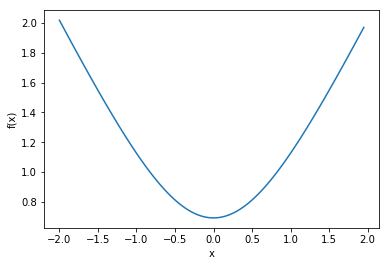

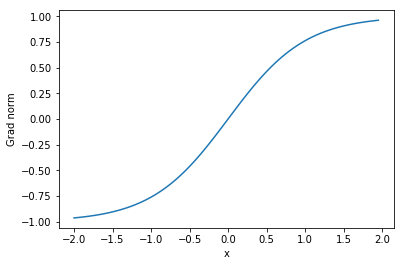

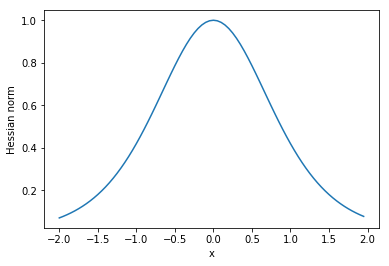

In [13]:
x=np.arange(-2, 2, 0.05)
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

plt.plot(x, grad_f(x))
plt.xlabel("x")
plt.ylabel("Grad norm")
plt.show()

plt.plot(x, hess_f(x))
plt.xlabel("x")
plt.ylabel("Hessian norm")
plt.show()

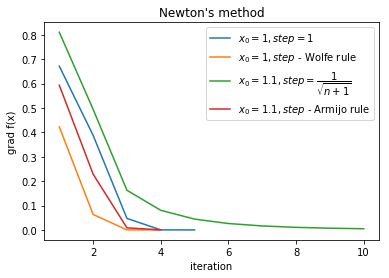

In [14]:
iter1 = np.arange(1, len(x1_history)+1, 1)
iter2 = np.arange(1, len(x2_history)+1, 1)
iter3 = np.arange(1, len(x3_history)+1, 1)
iter4 = np.arange(1, len(x4_history)+1, 1)
iter5 = np.arange(1, len(x5_history)+1, 1)

plt.plot(iter1, grad_f1_history, label='$x_0 = 1, step = 1$')
plt.plot(iter5, grad_f5_history, label='$x_0 = 1, step$ - Wolfe rule')
plt.plot(iter3, grad_f3_history, label='$x_0 = 1.1, step = \dfrac{1}{\sqrt{n+1}}$')
plt.plot(iter4, grad_f4_history, label='$x_0 = 1.1, step$ - Armijo rule')
plt.xlabel("iteration")
plt.ylabel("grad f(x)")
plt.title("Newton's method")
plt.legend()
plt.show()

## Задача 3
- (0.2 pts) Покажите, что справедлива формула Шермана-Моррисона-Вудбери

$$
(A + UV)^{-1} = A^{-1} - A^{-1} U \left( I_k + V A^{-1} U \right)^{-1} V A^{-1},
$$
где $A \in \mathbb{R}^{n \times n}$, $U \in \mathbb{R}^{n \times k}$ и $V \in \mathbb{R}^{k \times n}$.

- (0.2 pts) Покажите, что преобразование DFP даёт положительно определённую оценку для гессиана $B_{k+1}$
- (0.4 pts) Выведите (а не покажите, что формула справедлива!) формулу для $H_k$ в методе DFP
- Реализуйте BFGS метод и сравните его сходимость с методом Ньютона 
    - (0.3) для задачи минимизации функции Розенброка из $x_0 = (-1.2, 1)$
    - (0.5) для задачи

    $$
    \min_x \log \left( \sum_{i=1}^m \exp(a_i^{\top}x + b_i)\right).
    $$

- (0.4) Попробуйте разные условия (достаточного убывания, существенного убывания, условие кривизны) для выбора шага $\alpha_k$ (сравните минимум два условия), всегда ли выполнялось условие $s^{\top}_k y_k > 0$?

- Формула Шермана (доказательство из википедии)

$\left(A + UCV \right) \left[ A^{-1} - A^{-1}U \left(C^{-1} + VA^{-1}U \right)^{-1} VA^{-1} \right] = $

$ = \left\{ I - U\left(C^{-1} + VA^{-1}U \right)^{-1}VA^{-1} \right\} + \left\{ UCVA^{-1} - UCVA^{-1}U \left(C^{-1} + VA^{-1}U \right)^{-1} VA^{-1} \right\} = $

$ = \left\{ I + UCVA^{-1} \right\} - \left\{ U\left(C^{-1} + VA^{-1}U \right)^{-1}VA^{-1} + UCVA^{-1}U \left(C^{-1} + VA^{-1}U \right)^{-1} VA^{-1} \right\} = $

$ = I + UCVA^{-1} - \left(U + UCVA^{-1}U\right) \left(C^{-1} + VA^{-1}U\right)^{-1}VA^{-1} = $

$ = I + UCVA^{-1} - UC \left(C^{-1} + VA^{-1}U\right) \left(C^{-1} + VA^{-1}U\right)^{-1}VA^{-1} = $

$ = I + UCVA^{-1} - UCVA^{-1} = $

$ = I $

В частном случае (котором нужно было доказать) $C = I_k$ 

В частности, верна формула

$\left(A + uv^T \right) \left[ A^{-1} - \dfrac{A^{-1}u v^T A^{-1}}{1 + \langle A^{-1}u, v\rangle } \right]$

- DFP дает положительно определённую оценку для гессиана $B_{k+1}$

$B_{k+1} = (I - \rho_k y_k s_k^T) B_k (I - \rho_k s_k y_k^T) + \rho_k y_k y_k^T$

где $\rho_k = \dfrac{1}{y_k^T s_k}$

Если $B_k$ - положительно определенная, то она задает скалярное произведение $(a,b) = a^T B_k b$ и норму $(a,a) = a^T B_k a = \Vert a \Vert_B^2 $

$x^T B_{k+1} x =  (x^T - \rho_k \langle x,y_k \rangle s_k^T) B_k (x - \rho_k s_k \langle x, y_k \rangle) + \rho_k \langle x, y_k \rangle^2 = \Vert x^T - \rho_k \langle x,y_k \rangle s_k^T \Vert_B^2 + \rho_k \langle x, y_k \rangle^2 $

$\Vert x^T - \rho_k \langle x,y_k \rangle s_k^T \Vert_B^2 > 0$, $\langle x, y_k \rangle^2 > 0$, $\dfrac{1}{\rho_k} = y_k^T s_k = s_k^T B s_k > 0$

Значит, $x^T B_{k+1} x \Rightarrow$ $B_{k+1}$ - положительно-определенная

- Вывод формулы для $H_k$ в DFP

Применим формулу Шермана, где 
$B_{k+1} = \left(A + u v^T \right) = (I - \rho_k y_k s_k^T) B_k (I - \rho_k s_k y_k^T) + \rho_k y_k y_k^T =$

$ = B_k - \rho_k y_k s_k^T B_k - B_k \rho_k s_k y_k^T + \rho_k^2 y_k s_k^T B_k s_k y_k^T + \rho_k y_k y_k^T = $

$A = (I - \rho_k y_k s_k^T) B_k (I - \rho_k s_k y_k^T) $, $u = \rho_k y_k$, $v^T = y_k^T$

В свою очередь, 

$(I - \rho_k y_k s_k^T)^{-1} = I + \dfrac{ \rho_k y_k s_k^T}{1 - \rho_k y_k^T s_k}$

$(I - \rho_k s_k y_k^T)^{-1} = I + \dfrac{ \rho_k s_k y_k^T}{1 - \rho_k y_k^T s_k}$

$A^{-1} = (I + \dfrac{ \rho_k s_k y_k^T}{1 - \rho_k y_k^T s_k}) B_k^{-1} (I + \dfrac{ \rho_k y_k s_k^T}{1 - \rho_k y_k^T s_k})$

$B_{k+1}^{-1} = H_{k+1} = H_k - \dfrac{H_k y_k y_k^T H_k}{y_k^T H_k y_k} + \dfrac{s_k s_k^T}{y_k^T s_k}$

In [15]:
def Newton(f, gradf, hessf, x0, epsilon, num_iter, line_search, 
                    disp=False, callback=None, **kwargs):
    start = time.time()
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        opt_arg["iteration"] = iteration
        gradient = gradf(x)
        hess = hessf(x)
        h = np.linalg.solve(hess, -gradient)
        #h = -gradient / hess # так, наверное, лучше не делать 
        alpha = line_search(x, h, **opt_arg)
        x = x + alpha * h
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    end = time.time()
    print("Estimated time: ", (end - start))
    return res



def DFP(f, gradf, x0, epsilon, num_iter, line_search, 
                    disp=False, callback=None, **kwargs):
    start = time.time()
    H = np.eye(x0.size)
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        opt_arg["iteration"] = iteration
        gradient = gradf(x)
        h = -H @ gradient
        alpha = line_search(x, h, **opt_arg)
        x = x + alpha * h
        s = alpha * h
        y = gradf(x) - gradient
        Hy = H @ y
        H = H - np.dot(Hy.reshape(Hy.size,1) , Hy.reshape(1,Hy.size)) / (y.T @ H @ y) \
        + np.dot(s.reshape(s.size,1) , s.reshape(1,s.size))/ (y.T @ s)
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    end = time.time()
    print("Estimated time: ", (end - start))
    return res



def BFGS(f, gradf, x0, epsilon, num_iter, line_search, 
                    disp=False, callback=None, **kwargs):
    start = time.time()
    H = np.eye(x0.size)
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        opt_arg["iteration"] = iteration
        gradient = gradf(x)
        h = -H @ gradient
        alpha = line_search(x, h, **opt_arg)
        x = x + alpha * h
        s = alpha * h
        y = gradf(x) - gradient
        r = 1 / (y.T @ s)
        syT = np.eye(x.size) - r * np.dot(s.reshape(s.size,1) , y.reshape(1,y.size))
        ssT = r*np.dot(s.reshape(s.size,1) , s.reshape(1,s.size))
        H = syT @ H @ syT.T + ssT
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    end = time.time()
    print("Estimated time: ", (end - start))
    return res

- BFGS метод и сравнение с Ньютоновским для минимизации функции Розенброка

In [16]:
f = lambda x: (1-x[0])**2 + 100 * (x[1] - x[0]**2)**2
grad_f = lambda x: np.array([2*(x[0]-1) + 400 * (x[0]**2 - x[1]) * x[0], 200 * (x[1]-x[0]**2)])
hess_f = lambda x: np.array([[2 - 400 * x[1] + 1200 * x[0]**2,-400 * x[0]],[-400 * x[0],200]])
x0 = np.array([-1.2, 1])

num_iter = 100


x_history = []
f_history = []
grad_f_history = []
Newton(f, grad_f, hess_f, x0, 1e-6, num_iter, linesearch_, callback=callback,  
            alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)
x1_newton_linesearch = x_history
f1_newton_linesearch = f_history
grad_f1_newton_linesearch = grad_f_history


x_history = []
f_history = []
grad_f_history = []
Newton(f, grad_f, hess_f, x0, 1e-6, num_iter, sqrt_iter_stepsize, callback=callback,  
            alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)
x1_newton_sqrtiter = x_history
f1_newton_sqrtiter = f_history
grad_f1_newton_sqrtiter = grad_f_history


x_history = []
f_history = []
grad_f_history = []
Newton(f, grad_f, hess_f, x0, 1e-6, num_iter, armijo_stepsize, callback=callback,  
            alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)
x1_newton_armijo = x_history
f1_newton_armijo = f_history
grad_f1_newton_armijo = grad_f_history


x_history = []
f_history = []
grad_f_history = []
Newton(f, grad_f, hess_f, x0, 1e-6, num_iter, wolfe_stepsize, callback=callback,  
            alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)
x1_newton_wolfe = x_history
f1_newton_wolfe = f_history
grad_f1_newton_wolfe = grad_f_history





x_history = []
f_history = []
grad_f_history = []
BFGS(f, grad_f, x0, 1e-6, num_iter, linesearch_, callback=callback,  
            alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)
x1_bfgs_linesearch = x_history
f1_bfgs_linesearch = f_history
grad_f1_bfgs_linesearch = grad_f_history


x_history = []
f_history = []
grad_f_history = []
BFGS(f, grad_f, x0, 1e-6, num_iter, sqrt_iter_stepsize, callback=callback,  
            alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)
x1_bfgs_sqrtiter = x_history
f1_bfgs_sqrtiter = f_history
grad_f1_bfgs_sqrtiter = grad_f_history


x_history = []
f_history = []
grad_f_history = []
BFGS(f, grad_f, x0, 1e-6, num_iter, armijo_stepsize, callback=callback,  
            alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)
x1_bfgs_armijo = x_history
f1_bfgs_armijo = f_history
grad_f1_bfgs_armijo = grad_f_history


x_history = []
f_history = []
grad_f_history = []
BFGS(f, grad_f, x0, 1e-6, num_iter, wolfe_stepsize, callback=callback,  
            alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)
x1_bfgs_wolfe = x_history
f1_bfgs_wolfe = f_history
grad_f1_bfgs_wolfe = grad_f_history





#x3 = DFP(f, grad_f, x0, 1e-6, 100, armijo_stepsize, callback=callback,  
#            alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)

#x3 = BFGS(f, grad_f, x0, 1e-6, 100, armijo_stepsize, callback=callback,  
#            alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)

Estimated time:  0.0020003318786621094
Estimated time:  0.009005069732666016
Estimated time:  0.0030012130737304688
Estimated time:  0.003000020980834961
Estimated time:  0.006006717681884766
Estimated time:  0.011006593704223633
Estimated time:  0.0070056915283203125
Estimated time:  0.009005069732666016


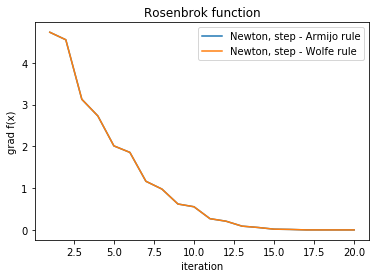

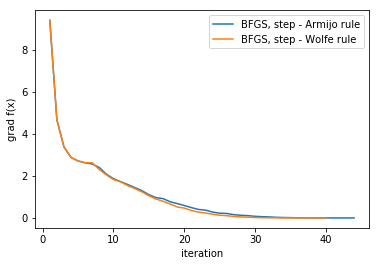

In [17]:
iter1 = np.arange(1, len(grad_f1_newton_linesearch)+1, 1)
iter2 = np.arange(1, len(grad_f1_newton_sqrtiter)+1, 1)
iter3 = np.arange(1, len(grad_f1_newton_armijo)+1, 1)
iter4 = np.arange(1, len(grad_f1_newton_wolfe)+1, 1)
iter5 = np.arange(1, len(grad_f1_bfgs_linesearch)+1, 1)
iter6 = np.arange(1, len(grad_f1_bfgs_sqrtiter)+1, 1)
iter7 = np.arange(1, len(grad_f1_bfgs_armijo)+1, 1)
iter8 = np.arange(1, len(grad_f1_bfgs_wolfe)+1, 1)

#plt.plot(iter1, f1_newton_linesearch, label='Newton,step = 1')
#plt.plot(iter2, f1_newton_sqrtiter, label='Newton, step = $\dfrac{1}{\sqrt{n+1}}$')
plt.plot(iter3, f1_newton_armijo, label='Newton, step - Armijo rule')
plt.plot(iter4, f1_newton_wolfe, label='Newton, step - Wolfe rule')
#plt.plot(iter7, np.log(iter7*0 + 2))
plt.xlabel("iteration")
plt.ylabel("grad f(x)")
plt.legend()
plt.title("Rosenbrok function")
plt.show()


#plt.plot(iter5, f1_bfgs_linesearch, label='BFGS,step = 1')
#plt.plot(iter6, f1_bfgs_sqrtiter, label='BFGS, step = $\dfrac{1}{\sqrt{n+1}}$')
plt.plot(iter7, f1_bfgs_armijo, label='BFGS, step - Armijo rule')
plt.plot(iter8, f1_bfgs_wolfe, label='BFGS, step - Wolfe rule')
#plt.plot(iter7, np.log(iter7*0 + 2))
plt.xlabel("iteration")
plt.ylabel("grad f(x)")
plt.legend()
plt.show()

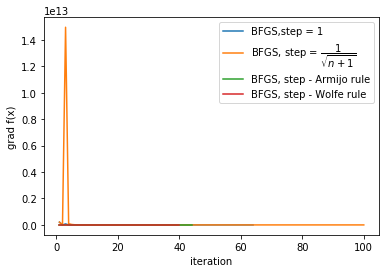

In [18]:
plt.plot(iter5, f1_bfgs_linesearch, label='BFGS,step = 1')
plt.plot(iter6, f1_bfgs_sqrtiter, label='BFGS, step = $\dfrac{1}{\sqrt{n+1}}$')
plt.plot(iter7, f1_bfgs_armijo, label='BFGS, step - Armijo rule')
plt.plot(iter8, f1_bfgs_wolfe, label='BFGS, step - Wolfe rule')
plt.xlabel("iteration")
plt.ylabel("grad f(x)")
plt.legend()
plt.show()

- BFGS метод и сравнение с Ньютоновским для задачи...

In [39]:
print(hess_f(x0))
print(grad_f(x0))

f(x0)

ret / sum_exp(x,a,b) =  [[1.80682429 3.07576571 1.26894146]
 [3.07576571 5.34470714 2.26894146]
 [1.26894146 2.26894146 1.00000005]]
grad * grad =  [[1.61021231 2.87915372 1.2689414 ]
 [2.87915372 5.14809512 2.26894139]
 [1.2689414  2.26894139 0.99999998]]
[[1.96611975e-01 1.96611991e-01 5.55755728e-08]
 [1.96611991e-01 1.96612013e-01 7.66711095e-08]
 [5.55755728e-08 7.66711095e-08 7.38343778e-08]]
[1.26894141 2.26894141 0.99999999]


array([5.31326169])

In [47]:
#define a, b, x0

a = np.array([[1,2,1], [-4,-5,-6], [2,3,1]])
b = np.array([1,2, -1])
x0 =  np.array([0,1,-2])

def max_degree(x, a=a, b=b):
    num = 0
    max_deg = a[0].T @ x + b[0]
    for i in range(a.shape[0]):
        competitor = a[0].T @ x + b[0]
        if (competitor > max_deg):
            num = i
            max_deg = competitor
    #print("num=", num)
    #print("")
    #print("max_deg = ", max_deg)
    #print("")
    return num


def f(x, a=a, b=b):
    x = np.array(x)
    x = x.reshape((x.size, 1))
    max_index = max_degree(x,a,b)
    max_deg = a[max_index].T @ x + b[max_index]
    rest = 0
    for i in range(a.shape[0]):
        rest = rest + np.exp(a[i].T @ x + b[i] - max_deg)
    #print("max_deg=", max_deg, " np.log(rest) = ", np.log(rest))
    #print("")
    return max_deg + np.log(rest)


def sum_exp(x,a=a,b=b):
    x = np.array(x)
    x = x.reshape((x.size, 1))
    max_index = max_degree(x,a,b)
    max_deg = a[max_index].T @ x + b[max_index]
    ret = 0
    for i in range(a.shape[0]):
        ret = ret + np.exp(a[i].T @ x + b[i] - max_deg)
    return ret

def grad_f(x, a=a, b=b):
    x = np.array(x)
    x = x.reshape((x.size, 1))
    max_index = max_degree(x,a,b)
    max_deg = a[max_index].T @ x + b[max_index]
    ret = np.zeros(x.size)
    for i in range(a.shape[0]):
        ret = ret + (np.exp(a[i].T @ x + b[i] - max_deg) * a[i])
    #print("grad = ", ret / sum_exp(x,a,b))
    #print("")
    return ret / sum_exp(x,a,b)

def hess_f(x, a=a, b=b):
    x = np.array(x)
    x = x.reshape((x.size, 1))
    max_index = max_degree(x,a,b)
    max_deg = a[max_index].T @ x + b[max_index]
    ret = np.zeros((x.size, x.size))
    for i in range(a.shape[0]):
        ret = ret + np.exp(a[i].T @ x + b[i] - max_deg) * np.dot(a[i].reshape(a.shape[1],1) , a[i].reshape(1,a.shape[1]))
    grad_tmp = grad_f(x,a,b)
    #print("ret / sum_exp(x,a,b) = ", ret / sum_exp(x,a,b))
    #print("")
    #print("grad * grad = ", np.dot(grad_tmp.reshape(a.shape[1],1) , grad_tmp.reshape(1,a.shape[1])))
    #print("")
    return ret / sum_exp(x,a,b) - np.dot(grad_tmp.reshape(a.shape[1],1) , grad_tmp.reshape(1,a.shape[1]))






x_history = []
f_history = []
grad_f_history = []
#Newton(f, grad_f, hess_f, x0, 1e-6, num_iter, linesearch_, callback=callback,  
#        alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)
x2_newton_linesearch = x_history
f2_newton_linesearch = f_history
grad_f2_newton_linesearch = grad_f_history


x_history = []
f_history = []
grad_f_history = []
#Newton(f, grad_f, hess_f, x0, 1e-6, num_iter, sqrt_iter_stepsize, callback=callback,  
#        alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)
x2_newton_sqrtiter = x_history
f2_newton_sqrtiter = f_history
grad_f2_newton_sqrtiter = grad_f_history


x_history = []
f_history = []
grad_f_history = []
#Newton(f, grad_f, hess_f, x0, 1e-6, num_iter, armijo_stepsize, callback=callback,  
#        alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)
x2_newton_armijo = x_history
f2_newton_armijo = f_history
grad_f2_newton_armijo = grad_f_history


x_history = []
f_history = []
grad_f_history = []
#Newton(f, grad_f, hess_f, x0, 1e-6, num_iter, wolfe_stepsize, callback=callback,  
#        alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)
x2_newton_wolfe = x_history
f2_newton_wolfe = f_history
grad_f2_newton_wolfe = grad_f_history





x_history = []
f_history = []
grad_f_history = []
BFGS(f, grad_f, x0, 1e-6, num_iter, linesearch_, callback=callback,  
     alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)
x2_bfgs_linesearch = x_history
f2_bfgs_linesearch = f_history
grad_f2_bfgs_linesearch = grad_f_history


x_history = []
f_history = []
grad_f_history = []
BFGS(f, grad_f, x0, 1e-6, num_iter, sqrt_iter_stepsize, callback=callback,  
     alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)
x2_bfgs_sqrtiter = x_history
f2_bfgs_sqrtiter = f_history
grad_f2_bfgs_sqrtiter = grad_f_history


x_history = []
f_history = []
grad_f_history = []
BFGS(f, grad_f, x0, 1e-6, num_iter, armijo_stepsize, callback=callback,  
     alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)
x2_bfgs_armijo = x_history
f2_bfgs_armijo = f_history
grad_f2_bfgs_armijo = grad_f_history


x_history = []
f_history = []
grad_f_history = []
BFGS(f, grad_f, x0, 1e-6, num_iter, wolfe_stepsize, callback=callback,  
     alpha=1, beta=0.1, rho=0.8, beta1=0.1, beta2=0.9)
x2_bfgs_wolfe = x_history
f2_bfgs_wolfe = f_history
grad_f2_bfgs_wolfe = grad_f_history



c:\dev\python372\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in exp
c:\dev\python372\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in exp
c:\dev\python372\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
c:\dev\python372\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp
c:\dev\python372\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


Estimated time:  0.10106706619262695
Estimated time:  0.10406875610351562


c:\dev\python372\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in multiply
c:\dev\python372\lib\site-packages\ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in matmul


Estimated time:  1.6170711517333984
Estimated time:  3.2938389778137207


In [56]:
f2_bfgs_armijo

[array([6.42311097]),
 array([3.98809968]),
 array([3.08292258]),
 array([0.81437413]),
 array([-0.62697027]),
 array([-13.65871612]),
 array([-44.82734372]),
 array([-1794.72229152]),
 array([-2019.77190537]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([n

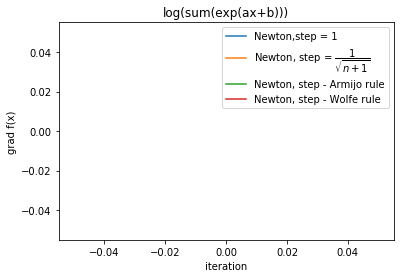

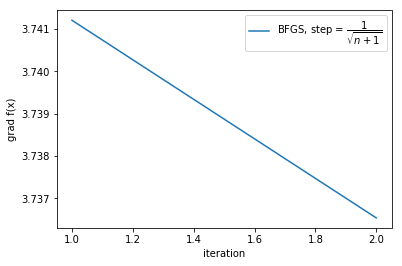

In [53]:
iter1 = np.arange(1, len(grad_f2_newton_linesearch)+1, 1)
iter2 = np.arange(1, len(grad_f2_newton_sqrtiter)+1, 1)
iter3 = np.arange(1, len(grad_f2_newton_armijo)+1, 1)
iter4 = np.arange(1, len(grad_f2_newton_wolfe)+1, 1)
iter5 = np.arange(1, len(grad_f2_bfgs_linesearch)+1, 1)
iter6 = np.arange(1, len(grad_f2_bfgs_sqrtiter)+1, 1)
iter7 = np.arange(1, len(grad_f2_bfgs_armijo)+1, 1)
iter8 = np.arange(1, len(grad_f2_bfgs_wolfe)+1, 1)

plt.plot(iter1, grad_f2_newton_linesearch, label='Newton,step = 1')
plt.plot(iter2, grad_f2_newton_sqrtiter, label='Newton, step = $\dfrac{1}{\sqrt{n+1}}$')
plt.plot(iter3, grad_f2_newton_armijo, label='Newton, step - Armijo rule')
plt.plot(iter4, grad_f2_newton_wolfe, label='Newton, step - Wolfe rule')
plt.xlabel("iteration")
plt.ylabel("grad f(x)")
plt.legend()
plt.title("log(sum(exp(ax+b)))")
plt.show()


#plt.plot(iter5, grad_f2_bfgs_linesearch, label='BFGS,step = 1')
plt.plot(iter6, grad_f2_bfgs_sqrtiter, label='BFGS, step = $\dfrac{1}{\sqrt{n+1}}$')
#plt.plot(iter7, grad_f2_bfgs_armijo, label='BFGS, step - Armijo rule')
#plt.plot(iter8, grad_f2_bfgs_wolfe, label='BFGS, step - Wolfe rule')
plt.xlabel("iteration")
plt.ylabel("grad f(x)")
plt.legend()
plt.show()

- Разные условия

## Задача 4 (1 pts)

Предложите свой квазиньютоновский метод, реализуйте его и сравните скорость его сходимости (по времени и по итерациям) с методом Ньютона и с методом BFGS, который Вы реализовали в задаче 3. Для сравнения используйте задачу 

$$
    \min_x \log \left( \sum_{i=1}^m \exp(a_i^{\top}x + b_i)\right).
$$

Обоснуйте (хотя бы в общих чертах), почему Ваш метод будет работать. 
Строгого доказательства я не требую, но мотивацию, которой Вы руководствовались, пожалуйста, приведите. 

In [ ]:
def myMethod(f, gradf, x0, epsilon, num_iter, line_search, 
                    disp=False, callback=None, **kwargs):
    H = np.eye(x0.size)
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        gradient = gradf(x)
        h = -H @ gradient
        alpha = line_search(x, h, **opt_arg)
        x = x + alpha * h
        s = alpha * h
        y = gradf(x) - gradient
        r = 1 / (y.T @ s)
        syT = np.eye(x.size) - r * np.dot(s.reshape(s.size,1) , y.reshape(1,y.size))
        ssT = r*np.dot(s.reshape(s.size,1) , s.reshape(1,s.size))
        H = syT @ H @ syT.T + ssT
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    return res